In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [2]:
# Load the data (Replace with your file path or interactive file selection)
data = pd.read_csv('fire_outreach.csv')
data.head(10)

,ID,Population_Density,Perc_Housing_Single_Family,Mean_Commute_Time,Percent_Properties_Commercial,Med_Housing_Value,Med_Housing_Year_Constructed,Perc_Housing_Furnace_5_Years,Number_Code_Citations
0,283560,200.889619,0.853255,8.689573,0.440598,230009.0613,1927.104272,0.500467,20.491458
1,636937,167.831930,0.878566,8.877122,0.450979,163896.7964,1932.530587,0.531077,19.580101
2,307963,148.746464,0.917207,7.461565,0.460016,126650.1994,1936.787276,0.512501,19.514893
3,1230674,215.723910,0.896746,7.089737,0.516714,174126.4931,1915.431501,0.450809,26.913125
4,1374165,274.593794,0.895520,8.188937,0.478098,189223.5849,1921.080289,0.512768,35.431294
5,1207047,197.846035,0.862861,8.565755,0.461125,156726.4270,1911.299570,0.463181,24.989376
6,103414,220.716261,0.896145,6.768834,0.490021,171601.3912,1939.877217,0.559873,21.309321
7,645767,213.069661,0.915683,8.092950,0.487890,161032.8637,1933.567920,0.524678,25.300468
8,1047672,215.960119,0.929755,6.584864,0.483442,260911.4306,1935.260801,0.539254,22.728287
9,519148,158.479567,0.930447,9.163875,0.459115,201836.6656,1928.773784,0.501941,21.629083


In [48]:
# Calculate and display correlation matrix
data.corr()


,ID,Population_Density,Perc_Housing_Single_Family,Mean_Commute_Time,Percent_Properties_Commercial,Med_Housing_Value,Med_Housing_Year_Constructed,Perc_Housing_Furnace_5_Years,Number_Code_Citations
ID,1.000000,0.000265,-0.000474,-0.000687,0.000126,-0.008761,-0.008781,-0.007679,0.008997
Population_Density,0.000265,1.000000,-0.985287,-0.126532,0.116294,-0.106283,-0.345011,-0.327817,0.294045
Perc_Housing_Single_Family,-0.000474,-0.985287,1.000000,0.122362,-0.112511,0.104226,0.339825,0.322168,-0.288892
Mean_Commute_Time,-0.000687,-0.126532,0.122362,1.000000,-0.912480,0.190256,0.099900,0.093206,-0.086119
Percent_Properties_Commercial,0.000126,0.116294,-0.112511,-0.912480,1.000000,-0.169188,-0.087778,-0.081168,0.075172
Med_Housing_Value,-0.008761,-0.106283,0.104226,0.190256,-0.169188,1.000000,0.022904,0.024991,-0.020255
Med_Housing_Year_Constructed,-0.008781,-0.345011,0.339825,0.099900,-0.087778,0.022904,1.000000,0.950016,-0.847830
Perc_Housing_Furnace_5_Years,-0.007679,-0.327817,0.322168,0.093206,-0.081168,0.024991,0.950016,1.000000,-0.806469
Number_Code_Citations,0.008997,0.294045,-0.288892,-0.086119,0.075172,-0.020255,-0.847830,-0.806469,1.000000


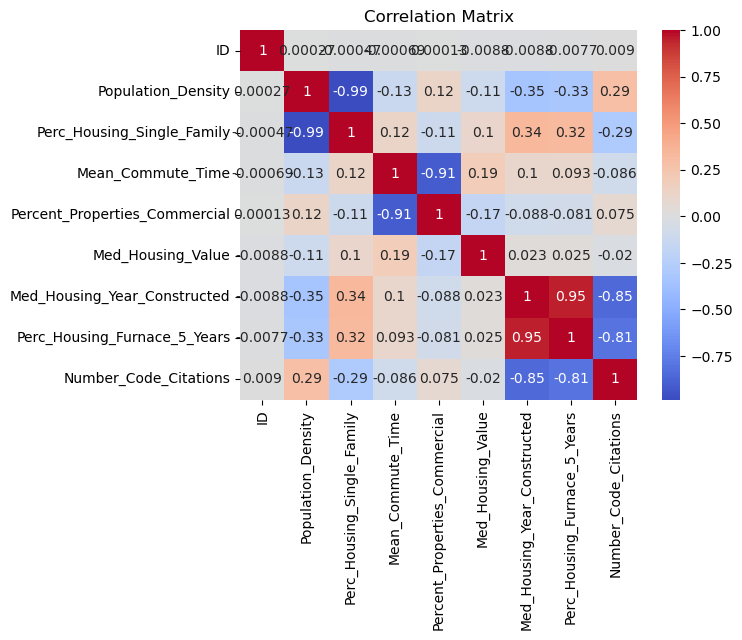

In [49]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [3]:
# Run PCA on data series columns
features = data.iloc[:, 1:9]  # Selecting columns 2 to 9
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA()
pca_data = pca.fit_transform(scaled_features)



In [4]:
# Display PCA loadings (rotations)
loadings = pd.DataFrame(data = pca.components_.T, columns = [f'PC{i+1}' for i in np.arange(pca_data.shape[1])])
loadings = loadings.set_index(features.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Population_Density,-0.376151,-0.058460,-0.587687,0.090259,0.012929,-0.000236,-0.012749,-0.707983
Perc_Housing_Single_Family,0.373439,0.057117,0.591615,-0.091653,-0.013471,0.003181,0.001336,-0.706172
Mean_Commute_Time,0.165239,0.641339,-0.189037,-0.150359,0.000214,-0.709243,0.002055,-0.002796
Percent_Properties_Commercial,-0.157308,-0.641503,0.191814,0.173959,0.002413,-0.704743,-0.002058,-0.000180
Med_Housing_Value,0.073096,0.248144,0.077729,0.962678,0.000728,0.016605,-0.003669,-0.001045
Med_Housing_Year_Constructed,0.484518,-0.190897,-0.268959,0.030983,0.291102,0.003262,-0.755467,0.004467
Perc_Housing_Furnace_5_Years,0.474204,-0.192085,-0.273328,0.037579,0.498069,0.003711,0.643413,-0.006900
Number_Code_Citations,-0.449481,0.188584,0.281068,-0.038240,0.816598,-0.001116,-0.122895,0.002178


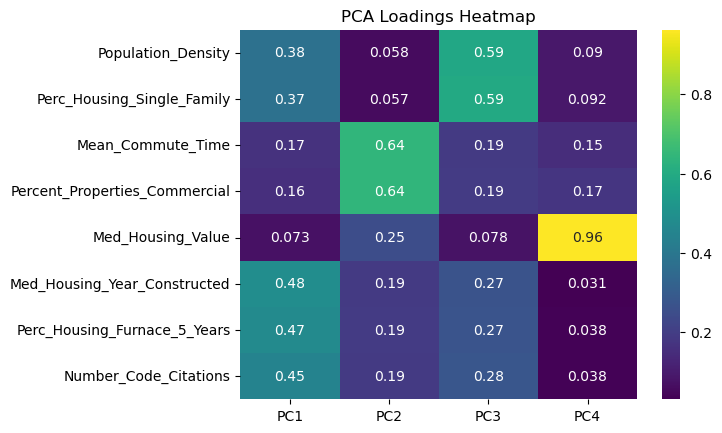

In [5]:
# Plot PCA loadings as heatmap
loading_df = pd.DataFrame(np.abs(pca.components_.T[:, :4]), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=features.columns)
sns.heatmap(loading_df, annot=True, cmap='viridis')
plt.title("PCA Loadings Heatmap")
plt.show()

In [6]:
# Apply thresholding to show only significant loadings
loading_threshold = 0.4
significant_loadings_df = loadings.map(lambda x: x if abs(x) > loading_threshold else 0)
print("\nSignificant Factor Loadings (Thresholded):")
significant_loadings_df


Significant Factor Loadings (Thresholded):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Population_Density,0.000000,0.000000,-0.587687,0.000000,0.000000,0.000000,0.000000,-0.707983
Perc_Housing_Single_Family,0.000000,0.000000,0.591615,0.000000,0.000000,0.000000,0.000000,-0.706172
Mean_Commute_Time,0.000000,0.641339,0.000000,0.000000,0.000000,-0.709243,0.000000,0.000000
Percent_Properties_Commercial,0.000000,-0.641503,0.000000,0.000000,0.000000,-0.704743,0.000000,0.000000
Med_Housing_Value,0.000000,0.000000,0.000000,0.962678,0.000000,0.000000,0.000000,0.000000
Med_Housing_Year_Constructed,0.484518,0.000000,0.000000,0.000000,0.000000,0.000000,-0.755467,0.000000
Perc_Housing_Furnace_5_Years,0.474204,0.000000,0.000000,0.000000,0.498069,0.000000,0.643413,0.000000
Number_Code_Citations,-0.449481,0.000000,0.000000,0.000000,0.816598,0.000000,0.000000,0.000000


In [56]:
# Create a DataFrame to display PCA summary
pca_summary_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Variance Ratio': pca.explained_variance_ratio_.cumsum(),
    'Eigenvalue': pca.explained_variance_
})

pca_summary_df

,Principal Component,Explained Variance Ratio,Cumulative Variance Ratio,Eigenvalue
0,PC1,0.414013,0.414013,3.312354
1,PC2,0.240723,0.654735,1.925930
2,PC3,0.184535,0.839271,1.476393
3,PC4,0.115293,0.954563,0.922411
4,PC5,0.026935,0.981498,0.215494
5,PC6,0.010898,0.992395,0.087188
6,PC7,0.005769,0.998164,0.046155
7,PC8,0.001836,1.000000,0.014686


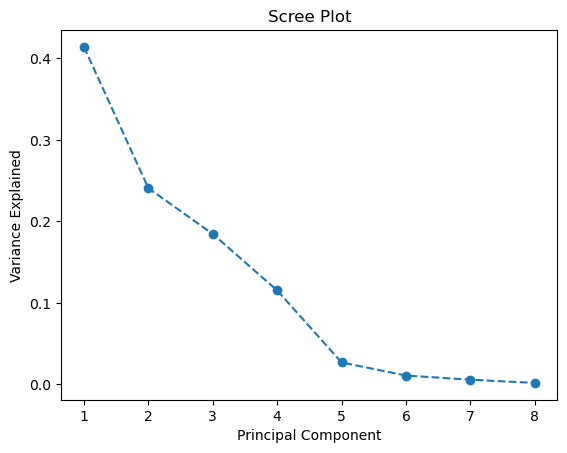

In [57]:
# Scree plot for PCA
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

In [9]:
# K-means clustering of data on first 3 PCs
n_clusters = 7
n_pcs = 3
kmeans = KMeans(n_clusters=n_clusters, max_iter=100, n_init=10)
kmeans.fit(pca_data[:, :n_pcs])


KMeans(max_iter=100, n_clusters=7, n_init=10)

In [10]:
cluster_centers_pca = pd.DataFrame(kmeans.cluster_centers_, columns =[f'PC{i+1}' for i in range(n_pcs)])
cluster_sizes = pd.Series(kmeans.labels_).value_counts(normalize=True).sort_index()
cluster_centers_pca['size'] = cluster_sizes.values
cluster_centers_pca = cluster_centers_pca.sort_values('size', ascending = False)
cluster_centers_pca.rename(columns={'PC1': 'Fire Risk', 'PC2': 'Commuting', 'PC3' : 'Urban'}, inplace=True) 
cluster_centers_pca

,Fire Risk,Commuting,Urban,size
1,-2.221936,-0.017100,-0.514554,0.278492
6,0.733990,-1.444034,-1.066890,0.175004
2,-0.314852,-0.270028,2.399041,0.144868
0,0.375495,0.083925,-0.228578,0.120162
4,2.702550,1.975890,-0.389534,0.119933
5,2.215698,-1.172379,0.832012,0.103411
3,-1.068032,2.927789,-0.510722,0.058131


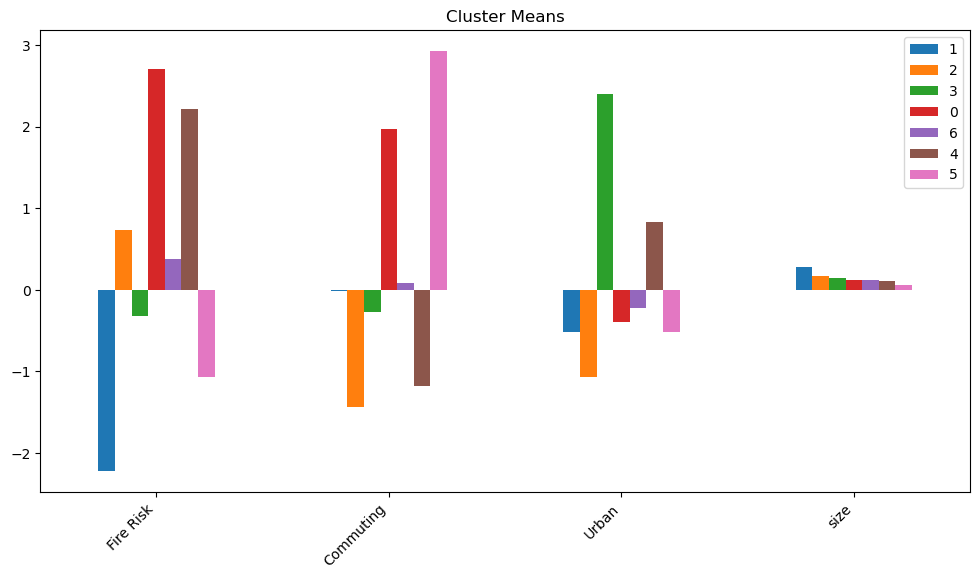

In [65]:
# Bar plot of cluster means
cluster_centers_pca.T.plot(kind="bar", figsize=(12, 6), title="Cluster Means")
plt.xticks(rotation=45, ha="right")
plt.show()

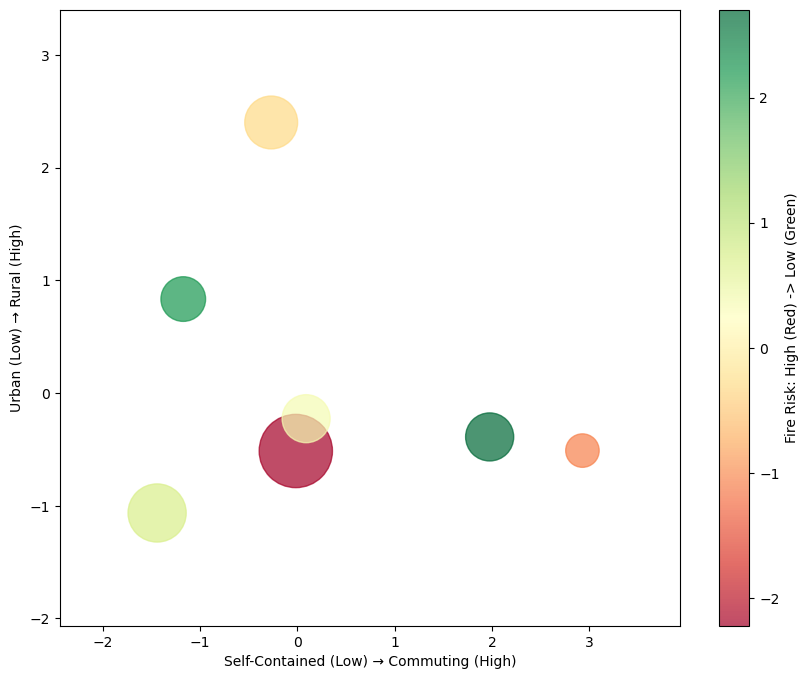

In [66]:
# Scatter plot for cluster centers in PCA space 
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x=cluster_centers_pca['Commuting'],             # X-axis as PC2
    y=cluster_centers_pca['Urban'],             # Y-axis as PC3
    s=cluster_centers_pca['size'] * 10000,    # Increased dot size factor based on cluster size
    c=cluster_centers_pca['Fire Risk'],             # Color based on PC1
    cmap='RdYlGn',                               # Red-to-green color map
    alpha=0.7
)

cbar = plt.colorbar(scatter)
cbar.set_label("Fire Risk: High (Red) -> Low (Green)")

# Custom axis labels and range adjustments
plt.xlabel('Self-Contained (Low) → Commuting (High)')
plt.ylabel('Urban (Low) → Rural (High)')
plt.xlim(cluster_centers_pca['Commuting'].min() - 1, cluster_centers_pca['Commuting'].max() + 1)
plt.ylim(cluster_centers_pca['Urban'].min() - 1, cluster_centers_pca['Urban'].max() + 1)

plt.show()